# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>1 |</span> Understand</b></div> 

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Additional display options
from IPython.display import display


# Load the Titanic dataset (replace 'train.csv' with your dataset)
df = pd.read_csv('./Assets/titanic_train.csv')

target_attribute = 'Survived'

list_of_columns = df.columns.values.tolist()
print(list_of_columns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


## <b><span style='color:#1f89e3'> 1.1 |</span> Data Dictionary</b>
Some small snippet explaining what the table is representing.


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Attribute Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
        <td>PassengerId</td>
        <td>Unique identifier for each passenger</td>
    </tr>
    <tr>
        <td>Survived</td>
        <td>Survival status (0 = No, 1 = Yes)</td>
    </tr>
    <tr>
        <td>Pclass</td>
        <td>Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)</td>
    </tr>
    <tr>
        <td>Name</td>
        <td>Passenger's name</td>
    </tr>
    <tr>
        <td>Sex</td>
        <td>Passenger's gender (male or female)</td>
    </tr>
    <tr>
        <td>Age</td>
        <td>Passenger's age</td>
    </tr>
    <tr>
        <td>SibSp</td>
        <td>Number of siblings/spouses aboard</td>
    </tr>
    <tr>
        <td>Parch</td>
        <td>Number of parents/children aboard</td>
    </tr>
    <tr>
        <td>Ticket</td>
        <td>Ticket number</td>
    </tr>
    <tr>
        <td>Fare</td>
        <td>Fare paid for the ticket</td>
    </tr>
    <tr>
        <td>Cabin</td>
        <td>Cabin number</td>
    </tr>
    <tr>
        <td>Embarked</td>
        <td>Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)</td>
    </tr>
  </tbody>
</table>

## <b><span style='color:#1f89e3'> 1.2 | </span>Preview Dataframe</b>

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<img src='./Assets/Attribute Summary.png' />

# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>2 |</span> Clean</b></div> 

## <b><span style='color:#1f89e3'> 2.1 | </span>Relevancy</b>
Filtering data or dropping columns that’s not relevant to the project. Also archive outdated data if applicable.

## <b><span style='color:#1f89e3'> 2.2 | </span>Completeness</b>

Handling missing data / null values. Often it’s either random, specific, or at some range. If there’s too much data missing, be sure to acknowledge that in your findings to whoever you’re presenting findings to. 


Attribute,Missing Percentage
Embarked,0.22%
Age,19.87%
Cabin,77.10%


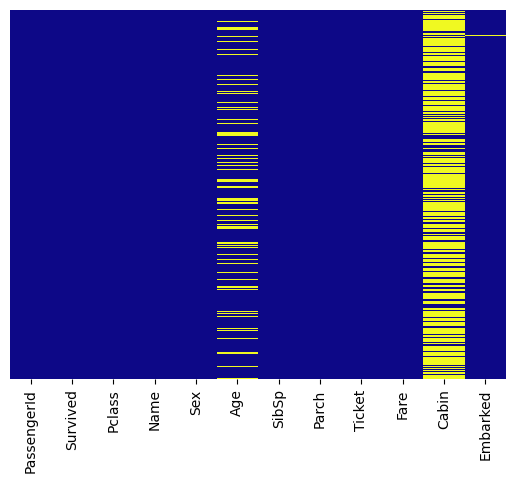

In [3]:
# Missing data in terms of percentages for each attribute.
def check_missing_data(data=df, threshold=0):
    
    # Calculate missing data percentages for each attribute
    missing = ((df.isnull().sum() / len(df)) * 100).round(2)
    filtered = missing[missing > threshold].reset_index()
    filtered.columns = ['Attribute', 'Missing Percentage']

    # Format and sort the DataFrame
    filtered['Missing Percentage'] = filtered['Missing Percentage'].apply(lambda x: f"{x:.2f}%")
    empties_df = filtered.sort_values(by='Missing Percentage').style.hide()

    # Check if the underlying DataFrame is empty
    if len(empties_df.data) == 0:
        print("No empties!")
    else:
        sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='plasma')
    
    return empties_df

check_missing_data()


In [4]:
df = df.drop(['PassengerId', # PassengerId is just an index and won't provide any predictive power
              'Ticket',      # Ticket numbers are random and won't provide any predictive power
              'Cabin'],      # Such a large percentage is missing and there's no way to engineer or impute the data
              axis=1)

In [5]:
# Strategically impute missing values in the age column
def impute_missing_ages(df):
    missing_age_df = df[df['Age'].isnull()]
    known_age_df = df[df['Age'].notnull()]
    
    features = ['Pclass', 'SibSp', 'Parch', 'Fare']
    X = known_age_df[features]
    y = known_age_df['Age']
    
    regressor = LinearRegression()
    regressor.fit(X, y)
    
    predicted_ages = regressor.predict(missing_age_df[features])
    
    # Set negative predicted ages to a minimum age (e.g., 0.5 or a suitable minimum age)
    min_age = 0.5
    predicted_ages = [max(age, min_age) for age in predicted_ages]
    
    df.loc[df['Age'].isnull(), 'Age'] = predicted_ages
    
    return df

impute_missing_ages(df)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.00954,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,30.0000,C


In [6]:
df.dropna(inplace=True) # Drop the remaining missing values from the Embarked column (0.22% of the data)

In [7]:
check_missing_data()

No empties!


Attribute,Missing Percentage


## <b><span style='color:#1f89e3'> 2.3 | </span>Validity</b>
Remove duplicates, address outliers, and check for contextual validity.

In [8]:
duplicates = df[df.duplicated()]

if len(duplicates) == 0:
    print("No duplicates!")
else:
    duplicates

No duplicates!


## <b><span style='color:#1f89e3'> 2.4 | </span>Consistent</b>

Formatting of data types & structures. Maintaining consistent units of measure too. So, developing or choosing a standard to consistently stick with is important.

## <b><span style='color:#1f89e3'> 2.5 | </span>Concise</b>

Using feature engineering to bring out more concise attributes.


In [9]:
# Function to create and preprocess age group feature
def create_age_group_feature(data=df):
    bins = [0, 12, 18, 30, 50, 100]
    labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
    
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
    
    return df

In [10]:
# Function to create and preprocess family size feature
def create_family_size_feature(data=df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    bins = [0, 1, 4, 11]
    labels = ['Solo', 'Small', 'Large']

    df['FamilySizeGroup'] = pd.cut(df['FamilySize'], bins=bins, labels=labels)

    return df

In [11]:
def create_title_feature(data=df):
    # Extract the title from the 'Name' column
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    # Create a dictionary to map the titles to categories
    title_dict = {
        'Mr': 'Mr',
        'Miss': 'Miss',
        'Mrs': 'Mrs',
        'Master': 'Master',
        'Dr': 'Officer',
        'Rev': 'Officer',
        'Col': 'Officer',
        'Major': 'Officer',
        'Mlle': 'Miss',
        'Mme': 'Mrs',
        'Ms': 'Miss',
        'Sir': 'Royalty',
        'Lady': 'Royalty',
        'Countess': 'Royalty',
        'Jonkheer': 'Royalty',
        'Don': 'Royalty',
        'Dona': 'Royalty'
    }

    # Map the titles to categories using the dictionary
    df['Title'] = df['Title'].map(title_dict)

    return df


In [12]:
def apply_feature_engineering():

    create_title_feature()
    create_age_group_feature()
    create_family_size_feature()

    return df

apply_feature_engineering()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,FamilySize,FamilySizeGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,7.2500,S,Mr,Young Adult,2,Small
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,71.2833,C,Mrs,Adult,2,Small
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,7.9250,S,Miss,Young Adult,1,Solo
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,53.1000,S,Mrs,Adult,2,Small
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,8.0500,S,Mr,Adult,1,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,13.0000,S,Officer,Young Adult,1,Solo
887,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,30.0000,S,Miss,Young Adult,1,Solo
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.00954,1,2,23.4500,S,Miss,Young Adult,4,Small
889,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,30.0000,C,Mr,Young Adult,1,Solo


In [13]:
# List categorical attributes
categorical_attributes = ["Sex", "Title", "AgeGroup", "FamilySizeGroup"]

In [14]:
# Moving the target attribute to the end of the DataFrame
column = df.pop(target_attribute)
df[target_attribute] = column

# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>3 |</span> Analyze</b></div> 
Mastering numpy and pandas will be critical to make attribute engineering easier. 

## <b><span style='color:#1f89e3'> 3.1 | </span>Intro</b>

## <b><span style='color:#1f89e3'> 3.2 | </span>Metrics</b>

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.000000,3.0,3.0000
Age,889.0,29.290771,13.461922,0.42,22.0000,27.539522,36.0,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.000000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.000000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.454200,31.0,512.3292
FamilySize,889.0,1.906637,1.614703,1.00,1.0000,1.000000,2.0,11.0000
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.000000,1.0,1.0000


In [16]:
metrics= ["Fare", "Parch", "FamilySize", "Pclass", "SibSp", "Age"]

## <b><span style='color:#1f89e3'> 3.3 | </span>Composition</b>

In [17]:
import plotly.express as px

# Loop through each categorical variable and create a treemap
for variable in categorical_attributes:
    
    # Calculate the average target attribute value for each category
    avg_prices = df.groupby(variable)[target_attribute].mean().reset_index()

    # Create the treemap
    fig = px.treemap(avg_prices, path=[variable], values=target_attribute, title=f'Treemap for {variable}')

    # Show the treemap
    fig.show()


## <b><span style='color:#1f89e3'> 3.4 | </span>Distribution</b>

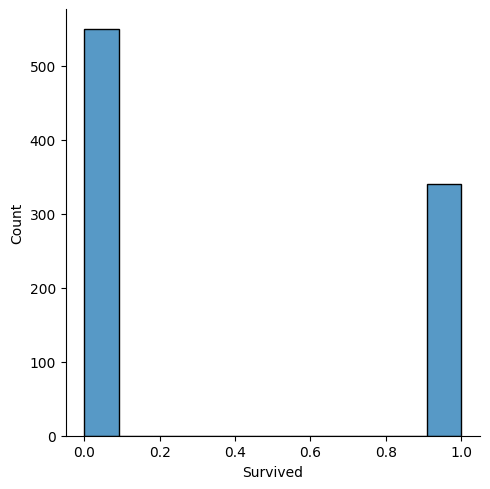

In [18]:
sns.displot(df[target_attribute])


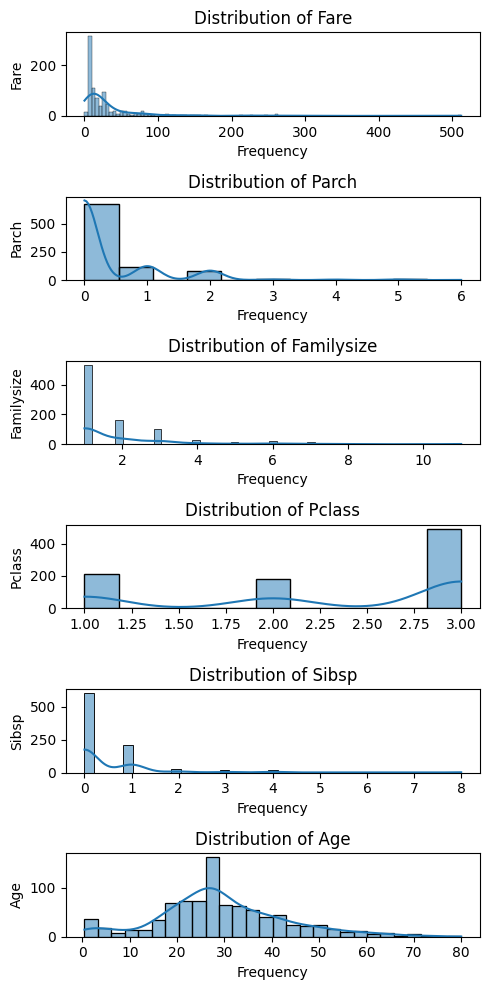

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a grid of subplots with a vertical layout
fig, axes = plt.subplots(len(metrics), 1, figsize=(5, 10))

# Loop through the metrics and create vertical distribution plots
for i, variable in enumerate(metrics):
    sns.histplot(data=df[variable], kde=True, ax=axes[i], orientation='vertical')  # Vertical orientation
    axes[i].set_title(f'Distribution of {variable.capitalize()}')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel(variable.capitalize())

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

## <b><span style='color:#1f89e3'> 3.5 | </span>Relationships</b>

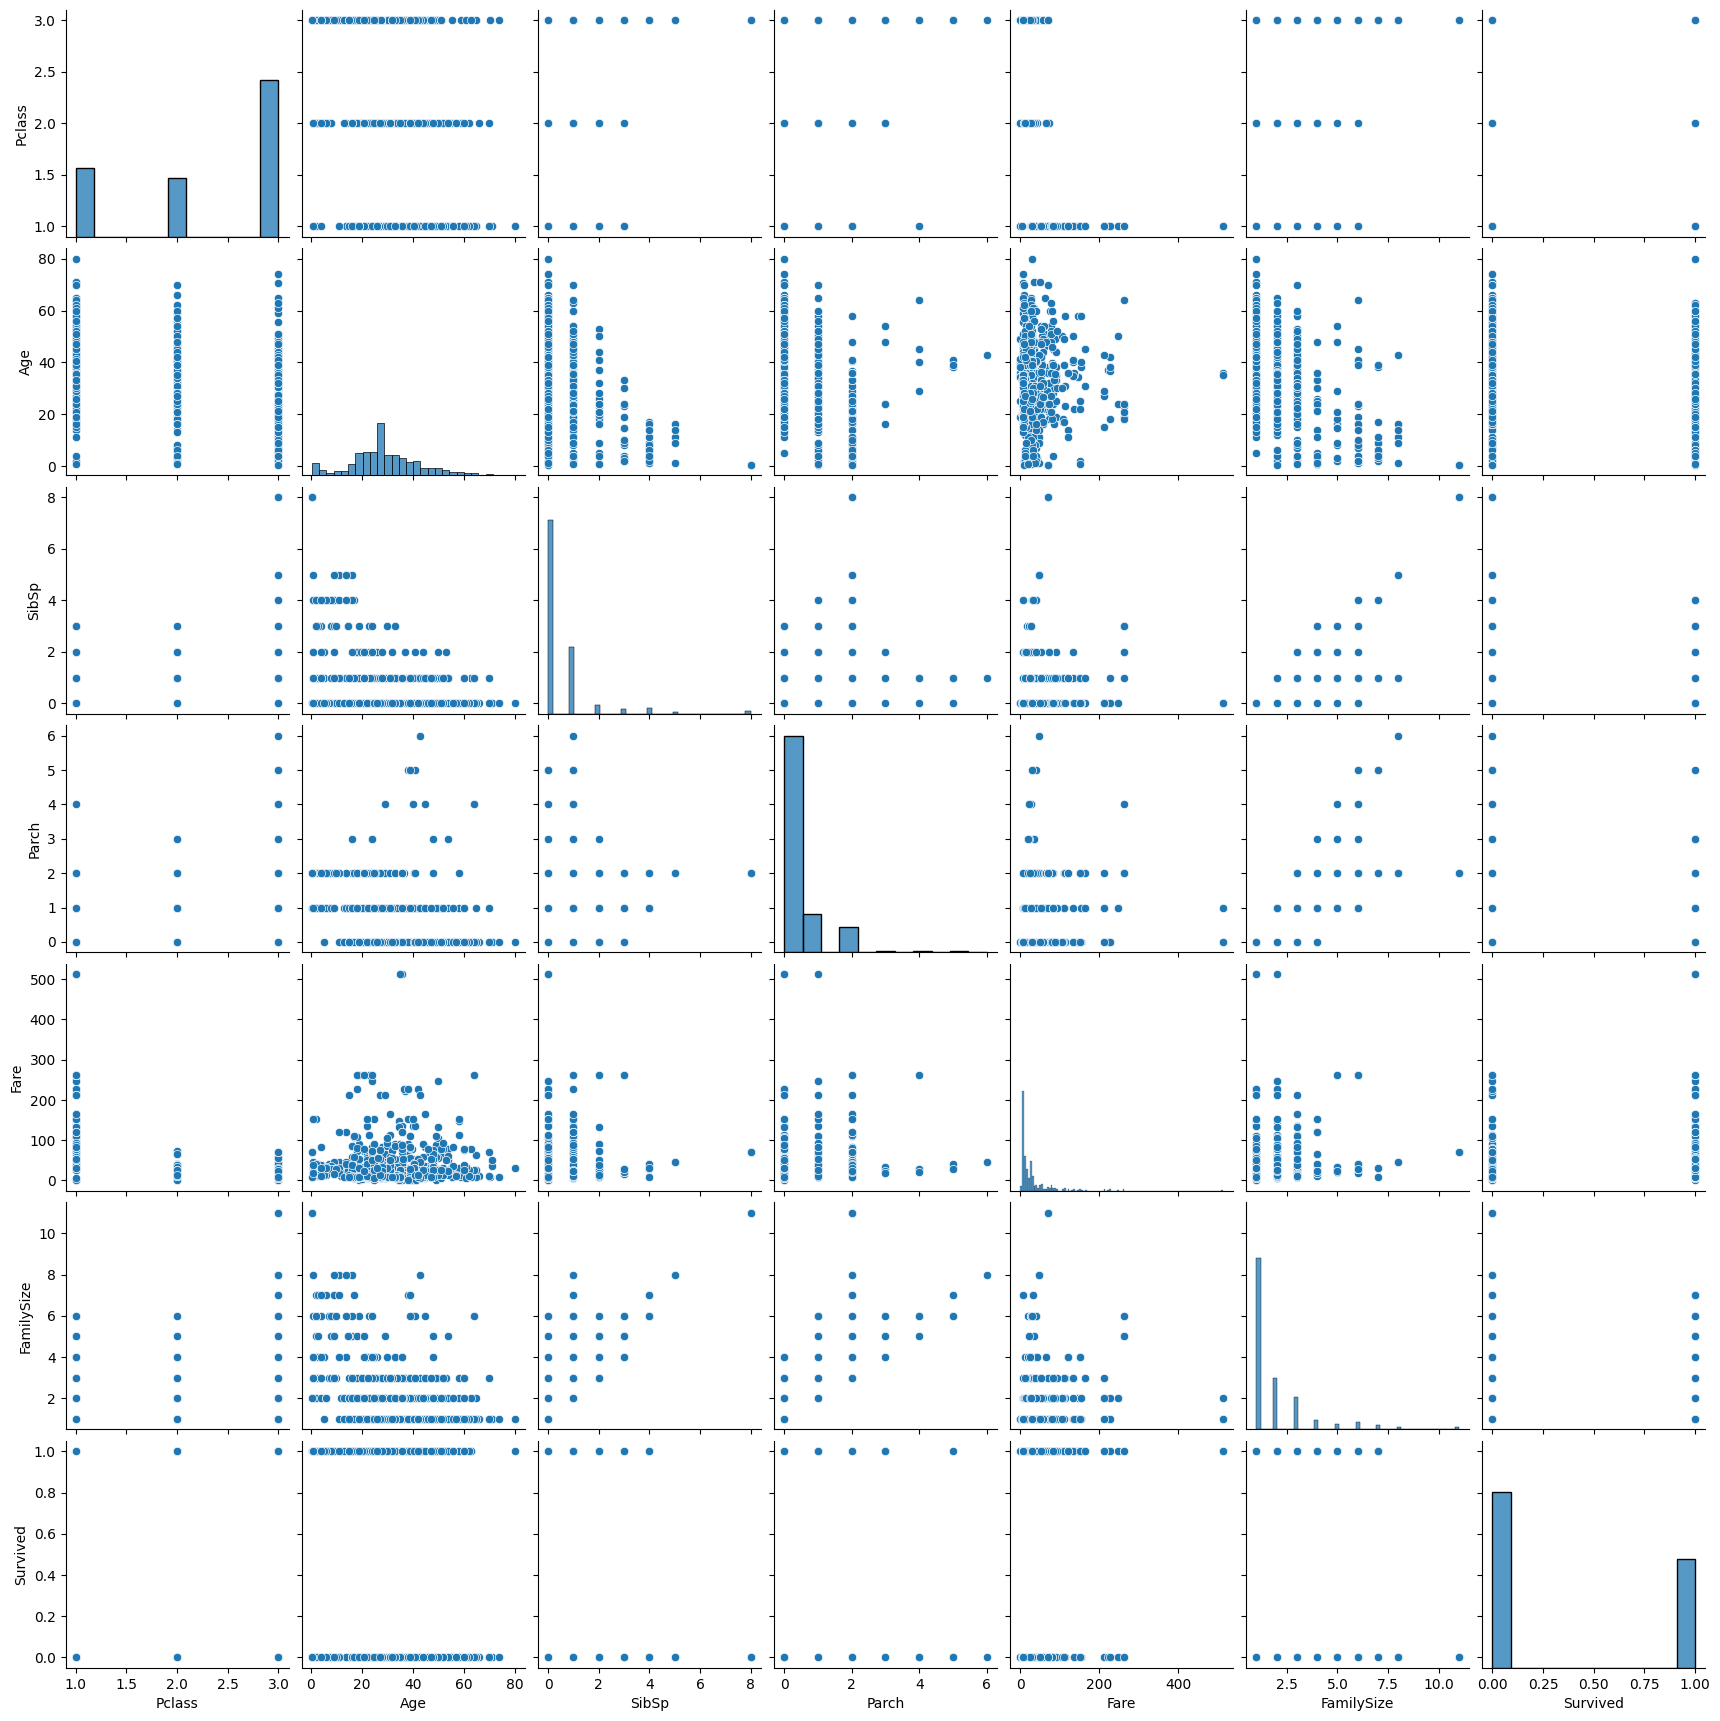

In [20]:
sns.pairplot(df)

<Axes: >

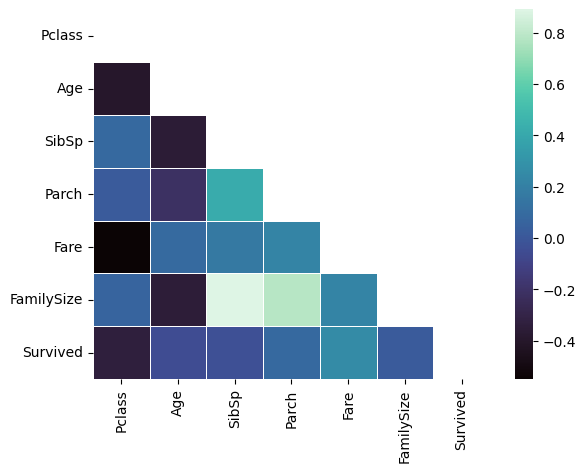

In [21]:
# Create a correlation matrix for numeric columns in the DataFrame
corr_matrix = df.corr(numeric_only=True)

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix))

# Color Options
diverging_cmap = 'coolwarm'
zero_continous_cmap = 'mako'

# Plot a heatmap of the correlation matrix with the mask
sns.heatmap(corr_matrix, linewidths=0.5, mask=mask, cmap=zero_continous_cmap, annot=False)

<Axes: >

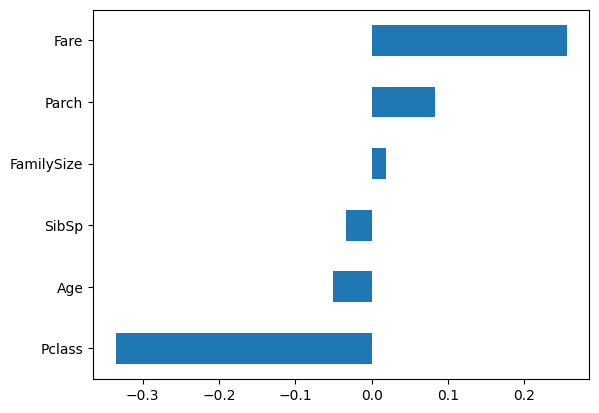

In [22]:
df.corr(numeric_only=True)[target_attribute].sort_values()[:-1].plot(kind='barh')

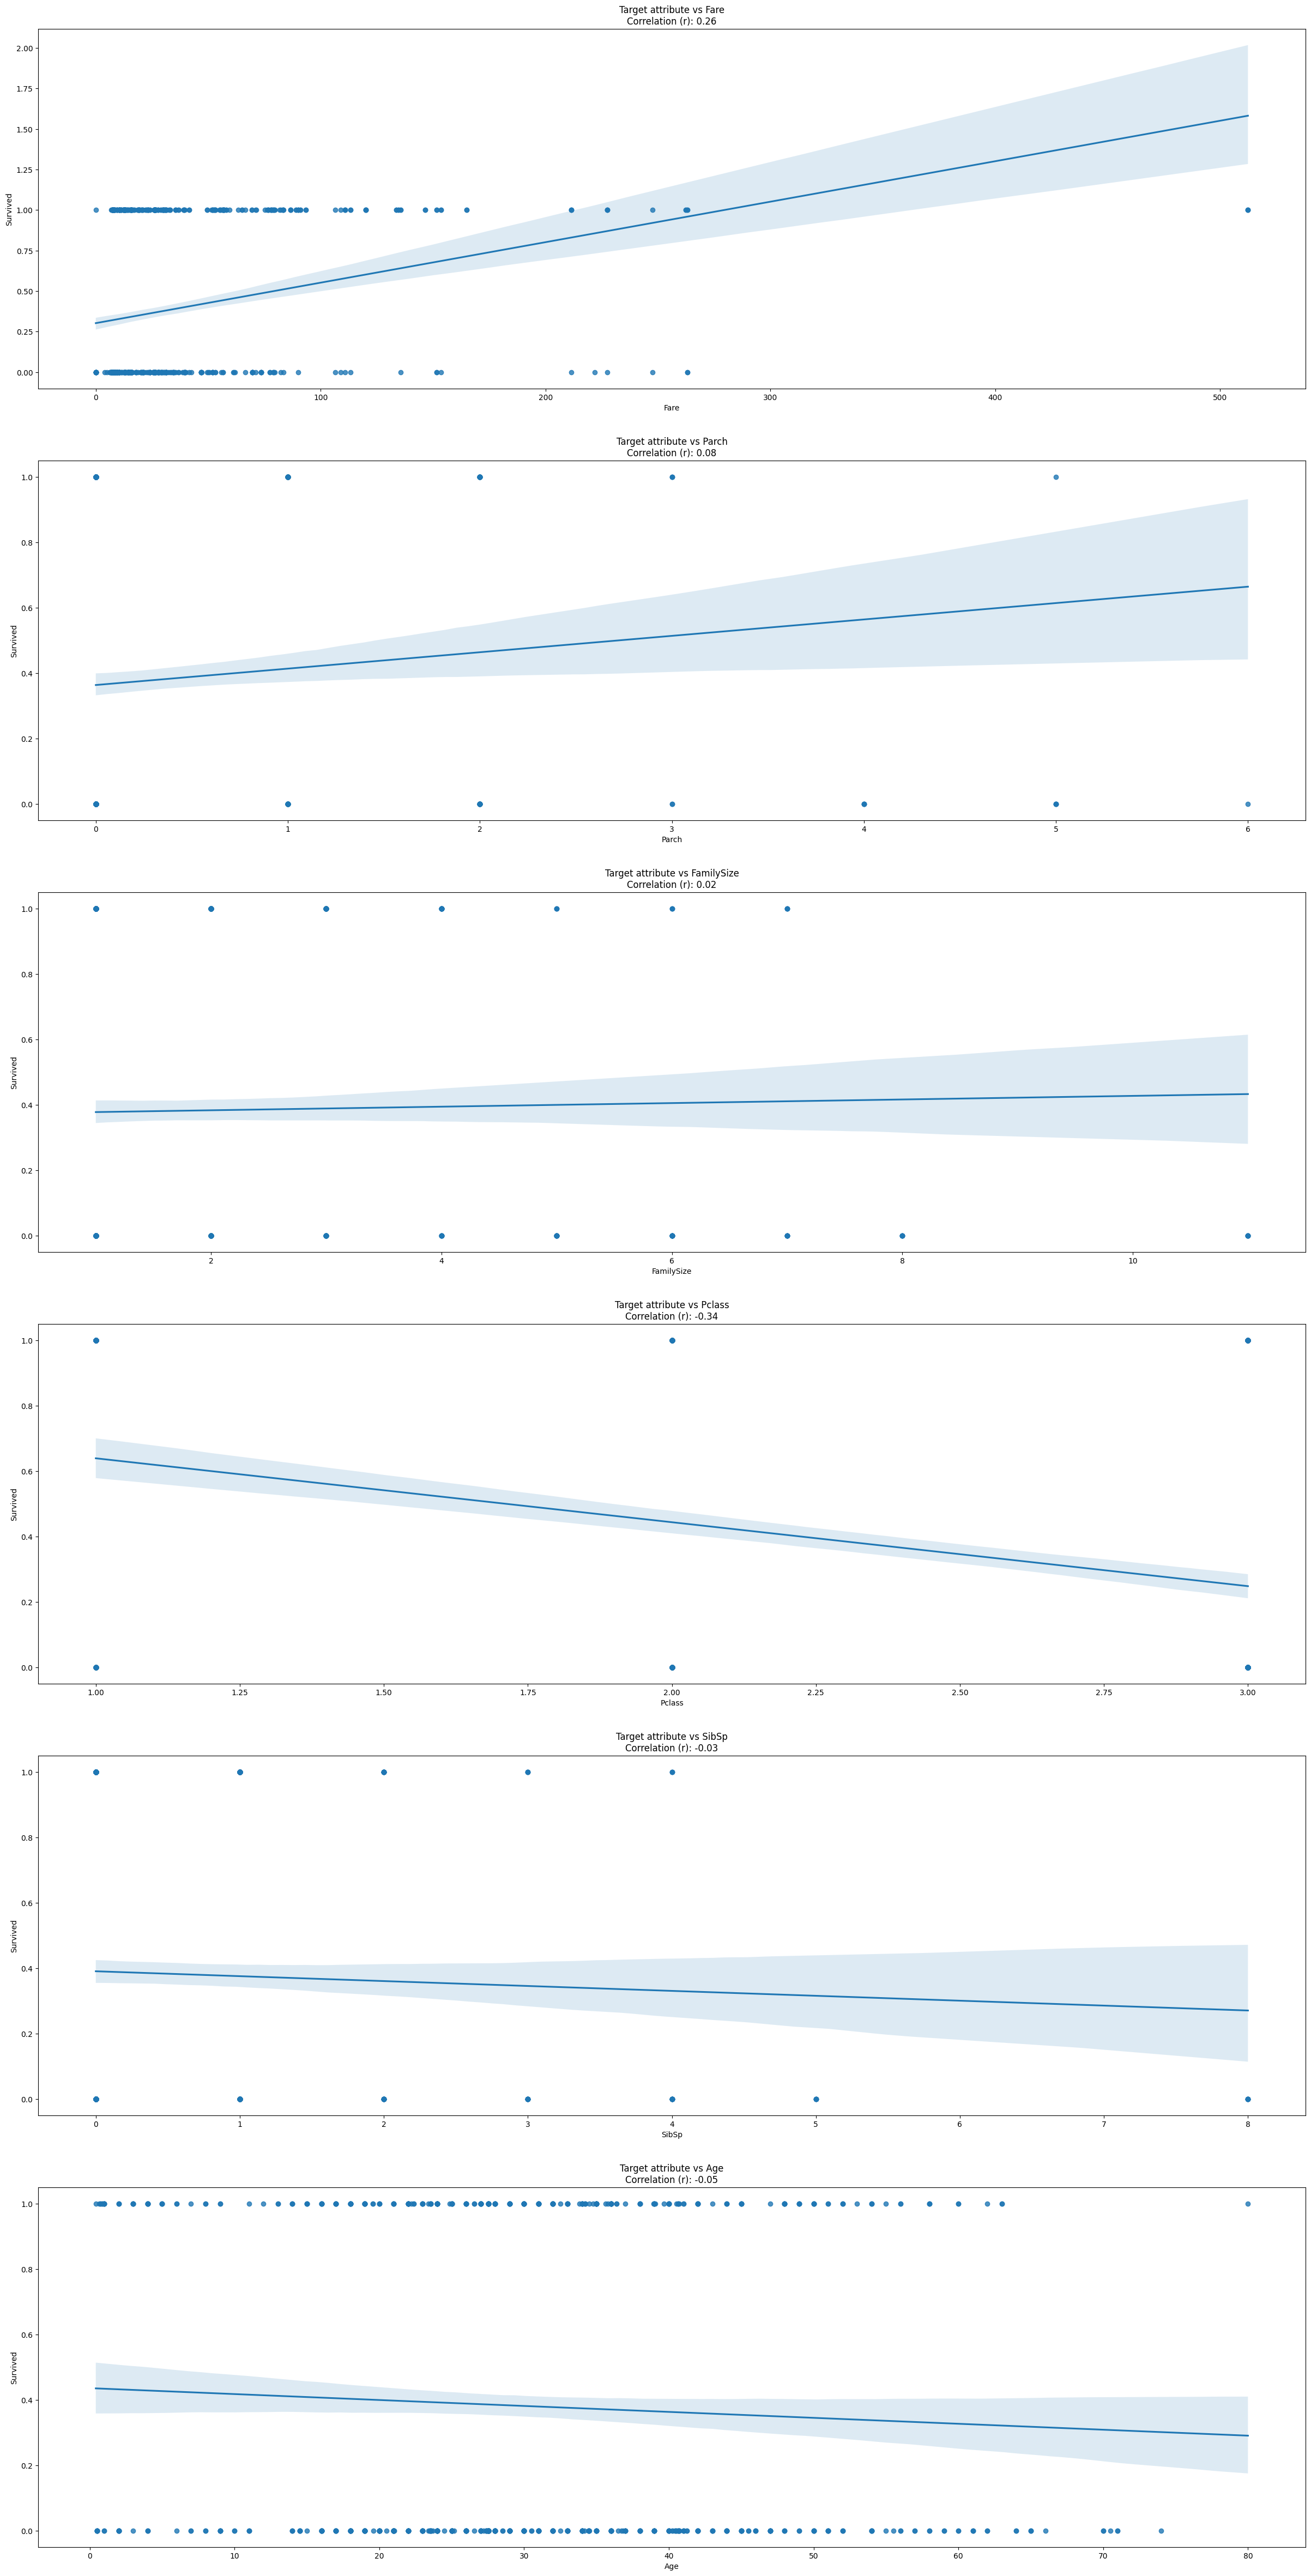

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(30, 60))


# Loop through the variables and plot regression lines
for i, variable in enumerate(metrics):
    sns.regplot(x=variable, y=target_attribute, data=df, ax=axes[i])

    # Calculate the correlation coefficient (r-value)
    r, _ = stats.pearsonr(df[variable], df[target_attribute])

    axes[i].set_title(
        f'Target attribute vs {variable}\nCorrelation (r): {r:.2f}')

    # Add x and y-axis labels
    axes[i].set_xlabel(variable)  # Set x-axis label
    axes[i].set_ylabel(target_attribute)    # Set y-axis label


# Show the plots
plt.show()

# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>4 |</span> Process</b></div> 

## <b><span style='color:#1f89e3'> 4.1 | </span>Encode</b>

In [24]:
# Encoding
def create_dummies(data):
    data = pd.get_dummies(data, columns=['AgeGroup'], drop_first=True)
    data = pd.get_dummies(data, columns=['FamilySizeGroup'], drop_first=True)
    return data

def create_title_feature(data):
    # Extract the title from the 'Name' column
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    # Create a dictionary to map the titles to categories
    title_dict = {
        'Mr': 1,
        'Miss': 2,
        'Mrs': 3,
        'Master': 4,
        'Officer': 5,
        'Royalty': 6
    }

    # Map the titles to categories using the dictionary
    data['Title'] = data['Title'].map(title_dict)
    data = df.dropna()

    return data

def create_embarked_feature(data):
    data['Embarked'] = data['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})
    return data

# Binary encoding for sex
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})

df = create_embarked_feature(df)
df = create_dummies(df)
df = create_title_feature(df)

# Drop the name column since we don't need it anymore
df = df.drop(['Name'], axis=1)

df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Survived,AgeGroup_Teenager,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,FamilySizeGroup_Small,FamilySizeGroup_Large
0,3,1,22.00000,1,0,7.2500,1,1.0,2,0,False,True,False,False,True,False
1,1,0,38.00000,1,0,71.2833,2,3.0,2,1,False,False,True,False,True,False
2,3,0,26.00000,0,0,7.9250,1,2.0,1,1,False,True,False,False,False,False
3,1,0,35.00000,1,0,53.1000,1,3.0,2,1,False,False,True,False,True,False
4,3,1,35.00000,0,0,8.0500,1,1.0,1,0,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,0,39.00000,0,5,29.1250,3,3.0,6,0,False,False,True,False,False,True
887,1,0,19.00000,0,0,30.0000,1,2.0,1,1,False,True,False,False,False,False
888,3,0,21.00954,1,2,23.4500,1,2.0,4,0,False,True,False,False,True,False
889,1,1,26.00000,0,0,30.0000,2,1.0,1,1,False,True,False,False,False,False


## <b><span style='color:#1f89e3'> 4.2 | </span>Split</b>

In [25]:
from sklearn.model_selection import train_test_split

# Full Data set
X = df.drop(target_attribute,axis=1)
y = df[target_attribute]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>5 |</span> Model</b></div> 

With all the prep work done, now we can have fun modeling. Which should be easy since we've prepared the data nicely.

## <b><span style='color:#1f89e3'> 5.1 | </span>Design</b>

### <b><span style='color:#1f89e3'>Create</span></b>

In [26]:
# Previous testing done with GridSearchCV. Tested with even more models before, but random forest always won.
# param_grid = {
#     "n_estimators": [50, 100, 200, 300],
#     "criterion": ["gini", "entropy"],
#     "max_depth": [None, 10, 20, 30],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
#     "max_features": ["auto", "sqrt", "log2"],
#     "bootstrap": [True, False]
# }

# Create and train a Random Forest classifier with specified hyperparameters
rf_classifier = RandomForestClassifier(
    bootstrap=False,
    criterion='entropy',
    max_depth=10,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=100
)

### <b><span style='color:#1f89e3'>Train</span></b>

In [27]:
# Train the classifier on the imputed data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       max_features='log2', min_samples_split=10)

## <b><span style='color:#1f89e3'> 5.2 | </span>Evaluate</b>

### <b><span style='color:#1f89e3'>Error Metrics</span></b>

In [28]:
# Calculate the predictions for your test data
predictions = rf_classifier.predict(X_test)

In [29]:
# Perform 5-fold cross-validation
scores = cross_val_score(rf_classifier, X, y, cv=5)
mean_accuracy = scores.mean()
std_deviation = scores.std()

print(f"The mean accuracy is {mean_accuracy:.2%} with a standard deviation of {std_deviation:.2%} \n")
print(classification_report(y_test,predictions))

The mean accuracy is 82.95% with a standard deviation of 2.40% 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.82      0.68      0.74        66

    accuracy                           0.82       173
   macro avg       0.82      0.79      0.80       173
weighted avg       0.82      0.82      0.82       173



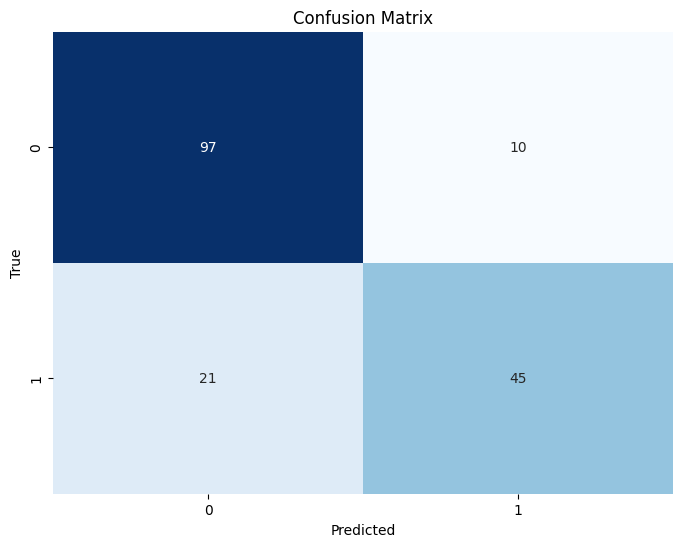

In [30]:
confusion_mat = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()